In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import t, describe

In [2]:
# Параметры задания
n = 100  # Размер выборки
q = 1.4  # Коэффициент для расчета вероятности
degrees_of_freedom = 8  # Степени свободы для t-распределения
k = 6

In [3]:
# 1 Генерация выборки из t-распределения
sample = np.random.standard_t(degrees_of_freedom, size=n)
print("Выборка: ", sample)

Выборка:  [ 1.28182893 -0.34076908 -1.56220219 -0.46619909 -0.14220837 -1.22316137
 -0.60067813 -0.08353196  1.19376127 -2.03932289 -0.59136608 -0.38666636
 -0.29259395 -0.38711015 -0.67843053 -2.73987718  0.63865062  0.1671047
 -0.08951337 -0.68202521  0.58000462 -0.00360676  1.2834157  -0.27428224
 -0.70052641 -0.12493806 -0.43567963 -0.59750017  0.73435604  0.21658301
  0.41078878 -0.90021376  1.245917    0.49685109 -0.23256545 -1.62683788
  2.29135124  0.48706689  1.53646267  0.07900117 -0.62895655  0.17704422
 -1.95286284 -2.48942348  0.21722115  1.30162146 -0.64396718 -0.62920529
 -1.25354942  0.74965623  1.14491008  0.18548737  0.97878134 -0.19186511
 -1.05166752  0.86873377  0.72990326  0.49987517 -0.19058938 -2.91359505
 -2.60381383 -0.85781327 -1.61265656  1.3221929  -0.12546116 -0.56398299
  0.38622879  2.53619144  0.90362468 -0.73733233  0.16120025  1.05712452
 -1.94341941  0.5904599  -1.21701991  1.14989558 -0.09958779 -2.56361397
  0.39378924 -0.62335918  1.02717823 -0.35

In [4]:
# 1.1 Интервальный ряд абсолютных частот
count, bins_edges = np.histogram(sample, bins="sturges")
print("Абсолютные частоты:", count)
print("Границы интервалов:", bins_edges)
print("Сумма абсолютных частот:", sum(count))

Абсолютные частоты: [ 6  7  9 27 23 18  7  3]
Границы интервалов: [-2.91359505 -2.22177528 -1.52995551 -0.83813574 -0.14631597  0.5455038
  1.23732357  1.92914333  2.6209631 ]
Сумма абсолютных частот: 100


In [5]:
# 1.2 Интервальный ряд относительных частот
count_rel, bins_edges_rel = np.histogram(sample, bins="sturges", density=True)
interval_width = bins_edges_rel[1] - bins_edges_rel[0]
print("Относительные частоты:", count_rel)
print("Сумма относительных частот:", sum(count_rel * interval_width))
print("Длина интервала абсолютных частот:", interval_width)

Относительные частоты: [0.08672779 0.10118242 0.13009169 0.39027506 0.33245653 0.26018337
 0.10118242 0.0433639 ]
Сумма относительных частот: 0.9999999999999999
Длина интервала абсолютных частот: 0.6918197689938883


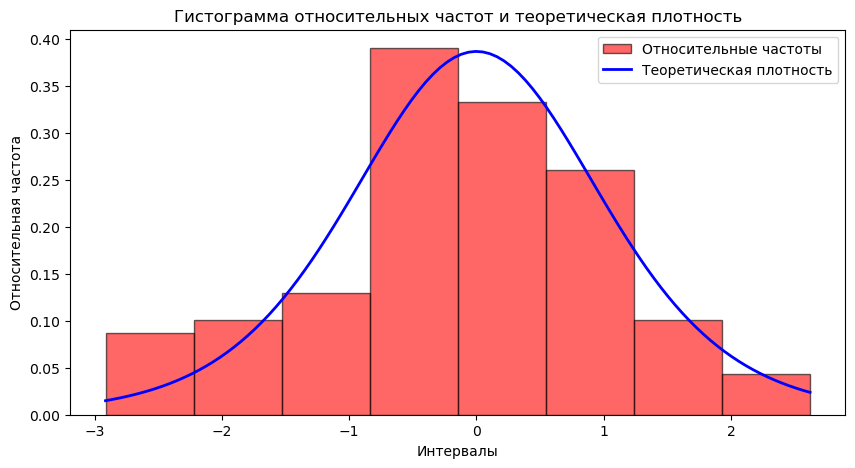

In [6]:
# 2.1 Гистограмма относительных частот и теоретическая плотность
plt.figure(figsize=(10, 5))
plt.hist(sample, bins="sturges", density=True, color="red", edgecolor="black", alpha=0.6, label="Относительные частоты")
x_vals = np.linspace(min(bins_edges), max(bins_edges), 100)
y_vals = t.pdf(x_vals, degrees_of_freedom)
plt.plot(x_vals, y_vals, color="blue", linewidth=2, label="Теоретическая плотность")
plt.title("Гистограмма относительных частот и теоретическая плотность")
plt.xlabel("Интервалы")
plt.ylabel("Относительная частота")
plt.legend()
plt.show()

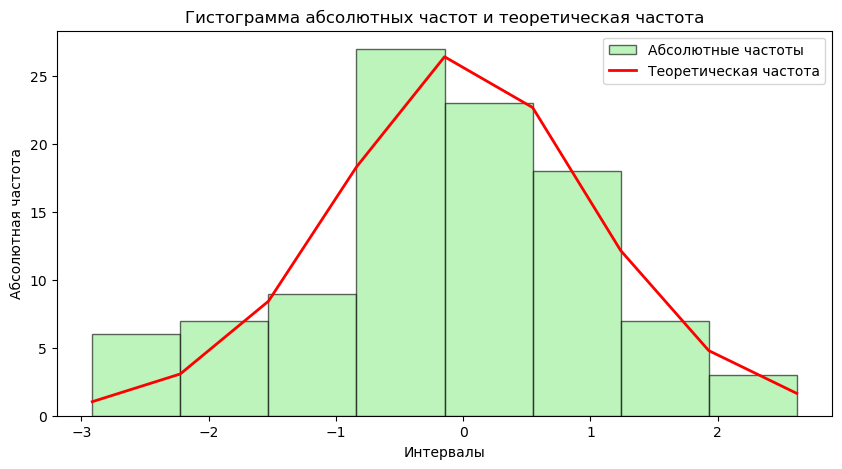

In [7]:
# 2.2 Гистограмма абсолютных частот и теоретическая частота
plt.figure(figsize=(10, 5))
plt.hist(sample, bins="sturges", color="lightgreen", edgecolor="black", alpha=0.6, label="Абсолютные частоты")
avs = t.pdf(bins_edges, degrees_of_freedom) * n * interval_width
plt.plot(bins_edges, avs, color="red", linewidth=2, label="Теоретическая частота")
plt.title("Гистограмма абсолютных частот и теоретическая частота")
plt.xlabel("Интервалы")
plt.ylabel("Абсолютная частота")
plt.legend()
plt.show()

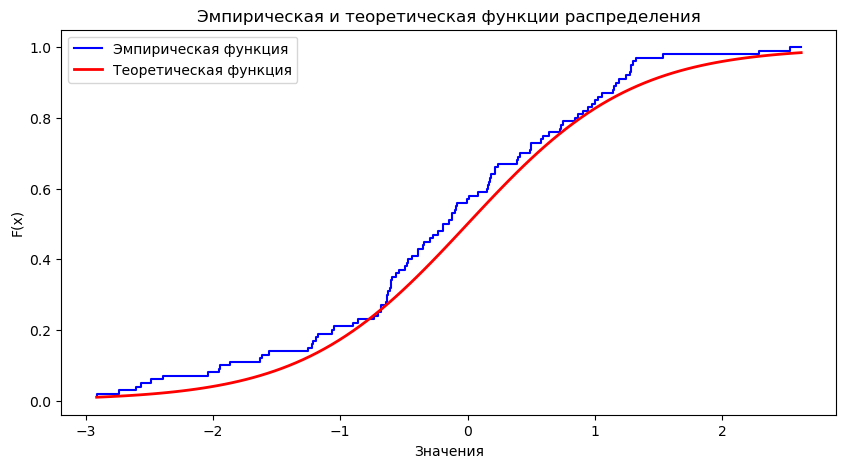

In [8]:

# 2.3 Эмпирическая и теоретическая функции распределения
plt.figure(figsize=(10, 5))
sorted_sample = np.sort(sample)
empirical_cdf = np.arange(1, n+1) / n
plt.step(sorted_sample, empirical_cdf, color="blue", label="Эмпирическая функция")
plt.plot(x_vals, t.cdf(x_vals, degrees_of_freedom), color="red", linewidth=2, label="Теоретическая функция")
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения")
plt.ylabel("F(x)")
plt.legend()
plt.show()

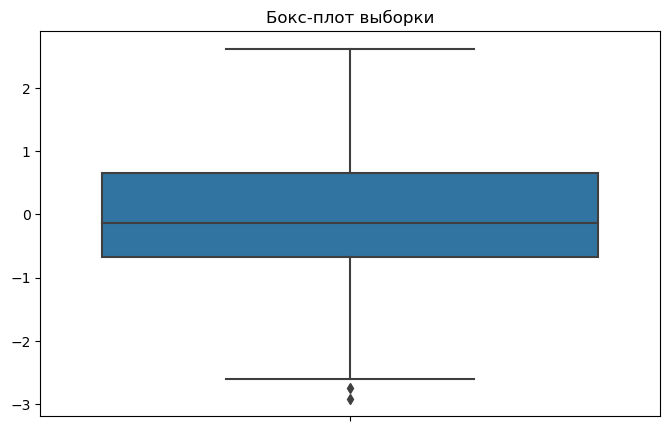

In [9]:
# 2.4 Бокс-плот выборки
plt.figure(figsize=(8, 5))
sb.boxplot(y=sample)
plt.title("Бокс-плот выборки")
plt.show()

In [10]:
iqr = np.percentile(sample, 75) - np.percentile(sample, 25)
lower_bound = np.percentile(sample, 25) - 1.5 * iqr
upper_bound = np.percentile(sample, 75) + 1.5 * iqr
theoretical_outliers = sum((sample < lower_bound) | (sample > upper_bound))
print("Число выбросов:", theoretical_outliers)
print("Теоретическое число выбросов ПРИ НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ ", 0.05*n)

Число выбросов: 2
Теоретическое число выбросов ПРИ НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ  5.0


In [11]:
# 3. Ответы на вопросы
interval_start = bins_edges[k-1]
interval_end = bins_edges[k]

# Оценка вероятности попадания в k-й интервал
probability_in_kth_interval = (count[k-1] * (interval_end - interval_start))
print(f"Оценка вероятности попадания значений в {k}-й интервал: {probability_in_kth_interval}")

theoretical_probability_in_kth_interval = t.cdf(interval_end, degrees_of_freedom) - t.cdf(interval_start, degrees_of_freedom)
print(f"Теоретическая вероятность попадания значений в {k}-й интервал: {theoretical_probability_in_kth_interval}")


Оценка вероятности попадания значений в 6-й интервал: 12.452755841889998
Теоретическая вероятность попадания значений в 6-й интервал: 0.17461533242182348


In [12]:
# 4. Расчет вероятности P(*)
p_theoretical = t.cdf(q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2)), degrees_of_freedom) - t.cdf(-q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2)), degrees_of_freedom)
print("Теоретическая вероятность P(*) по формуле:", p_theoretical)

count_in_interval = np.sum((sample >= -q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))) & (sample <= q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))))
estimated_probability = count_in_interval / n
print(f"Оценка вероятности по выборке для n={n}: {estimated_probability}")

# 4.3 Увеличение объема выборки
large_sample = np.random.standard_t(degrees_of_freedom, size=50 * n)
count_in_interval_large = np.sum((large_sample >= -q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))) & (large_sample <= q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))))
estimated_probability_large = count_in_interval_large / (50*n)

print(f"Оценка вероятности по выборке для n={50*n}: {estimated_probability_large}")


Теоретическая вероятность P(*) по формуле: 0.8553689888452527
Оценка вероятности по выборке для n=100: 0.86
Оценка вероятности по выборке для n=5000: 0.8502


In [13]:
# 5. Точечные оценки параметров распределения
mean_estimate = np.mean(sample)
median_estimate = np.median(sample)
variance_estimate = np.var(sample, ddof=1)
std_dev_estimate = np.std(sample, ddof=1)
skewness_estimate = ((sample - mean_estimate) ** 3).mean() / (std_dev_estimate ** 3)
kurtosis_estimate = ((sample - mean_estimate) ** 4).mean() / (std_dev_estimate ** 4) - 3


In [14]:
print("Оценка мат. ожидания: ", mean_estimate)
print("Медиана: ", median_estimate)
print("Дисперсия:", variance_estimate)
print("Стандартное отклонение:", std_dev_estimate)
print("Асимметрия:", skewness_estimate)
print("Эксцесс:", kurtosis_estimate)

Оценка мат. ожидания:  -0.14973650621114232
Медиана:  -0.13383476492847896
Дисперсия: 1.2953021374445044
Стандартное отклонение: 1.1381134115036622
Асимметрия: -0.21341843989337772
Эксцесс: -0.010420105885324826


In [15]:
# Использование scipy для проверки результатов
desc_stats = describe(sample)
print("Результаты describe():")
print("Оценка мат. ожидания:", desc_stats.mean)
print("Дисперсия:", desc_stats.variance)
print("Асимметрия:", desc_stats.skewness)
print("Эксцесс:", desc_stats.kurtosis)

Результаты describe():
Оценка мат. ожидания: -0.14973650621114232
Дисперсия: 1.2953021374445044
Асимметрия: -0.21666020461259586
Эксцесс: 0.050280475578690975


In [16]:
# Повторное вычисление с увеличенной выборкой
large_mean_estimate = np.mean(large_sample)
large_median_estimate = np.median(large_sample)
large_variance_estimate = np.var(large_sample, ddof=1)
large_skewness_estimate = ((large_sample - large_mean_estimate) ** 3).mean() / np.std(large_sample)**3
large_kurtosis_estimate = ((large_sample - large_mean_estimate) ** 4).mean() / np.std(large_sample)**4 - 3


In [17]:
print("Оценки для увеличенной выборки:")
print("Оценка мат. ожидания:", large_mean_estimate)
print("Медиана: ", large_median_estimate)
print("Дисперсия:", large_variance_estimate)
print("Ассиметрия:", large_skewness_estimate)
print("Эксцесс:", large_kurtosis_estimate)

Оценки для увеличенной выборки:
Оценка мат. ожидания: -0.016137437553587573
Медиана:  -0.04216728579073926
Дисперсия: 1.327652217961161
Ассиметрия: 0.0613276759296601
Эксцесс: 1.3371052054691512
